In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import torch
from torch.utils.data.sampler import SubsetRandomSampler
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.autograd import Variable

from PIL import Image
import glob,os
from imageio import imread
import functions as func
import sys

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [3]:
data_dir ="./commoncharacter>1250/"
os.listdir(data_dir)[0]
names = []
for j in os.listdir(data_dir):
    print(j, len( glob.glob(data_dir+j+"/*.png")))
    file = glob.glob(data_dir+j)        
    names.append(file)

何 1263
兵 1261
向 1261
名 1262
妻 1257
似 1261
其 1253
古 1263
什 1251
便 1261
信 1261
京 1261
善 1260
委 1258
台 1261
保 1261
制 1260
固 1260
妹 1260
刀 1258
副 1260
令 1262
受 1260
型 1261
周 1260
件 1259
侵 1251
堤 1251
像 1260
化 1262
之 1252
女 1260
否 1259
助 1261
典 1260
仁 1259
修 1261
列 1258
但 1252
在 1262
卵 1258
因 1261
外 1263
包 1259
史 1261
司 1260
反 1257
候 1259
九 1260
勇 1259
入 1259
出 1257
函 1251
丁 1261
例 1258
公 1262
分 1261
十 1260
五 1263
共 1261
刊 1260
不 1263
垂 1260
代 1261
傍 1251
同 1263
七 1261
停 1261
作 1262
倒 1251
使 1262
世 1260
元 1262
冒 1251
久 1262
三 1262
力 1260
博 1260
二 1260
命 1261
唱 1260
上 1262
奔 1252
印 1260
夏 1261
含 1251
判 1260
午 1260
也 1251
且 1252
土 1260
奇 1251
兄 1260
付 1260
勤 1256
借 1260
及 1252
口 1259
先 1262
困 1259
下 1261
到 1251
天 1262
具 1259
八 1261
健 1260
城 1260
如 1251
俗 1251
卒 1260
位 1260
初 1261
唐 1252
六 1260
告 1262
后 1260
夫 1262
交 1260
今 1261
了 1252
供 1261
均 1257
丸 1259
乾 1251
嘉 1251
任 1261
休 1260
再 1261
境 1259
催 1251
割 1260
回 1261
士 1260
亡 1260
央 1260
好 1261
吐 1251
原 1261
各 1261
丹 1251
予 1260
堂 1261
和 1260

In [4]:
print(names[1])

num_epochs = 5
num_classes = len(os.listdir(data_dir))
print("num of classes", num_classes)
batch_size = 100
learning_rate = 0.001
size_IMG = 32

['./commoncharacter>1250/兵']
num of classes 227


./commoncharacter>1250/功/Fang zheng Xi deng xian Font-Simplified Chinesettf.png


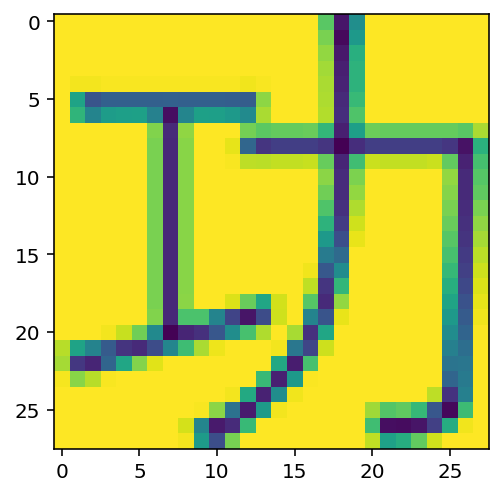

SystemExit: 

/home/wonton/anaconda3/envs/momotorch/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
for i in data_dir+j+"/*.png":
    file = glob.glob(data_dir+j+"/*.png")[0]
    print(file)
    img = imread(file)
    plt.imshow(img)
    plt.show()
    sys.exit()

In [6]:
def load_split_train_test(datadir, valid_size = .2):
    train_transforms = transforms.Compose([transforms.Resize(size_IMG),
                                       transforms.ToTensor(),
                                       ])
    
    test_transforms = transforms.Compose([transforms.Resize(size_IMG),
                                      transforms.ToTensor(),
                                      ])
    
    train_data = datasets.ImageFolder(datadir,       
                    transform=train_transforms)
    
    test_data = datasets.ImageFolder(datadir,
                    transform=test_transforms)
    
    num_train = len(train_data)
    print("number of training data is", num_train)
    
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    
    np.random.shuffle(indices)
    
    train_idx, test_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)
    
    trainloader = torch.utils.data.DataLoader(train_data,
                   sampler=train_sampler, batch_size=batch_size)
    testloader = torch.utils.data.DataLoader(test_data,
                   sampler=test_sampler, batch_size=batch_size)
    
    return trainloader, testloader

train_loader, test_loader = load_split_train_test(data_dir, .2)
print(train_loader.dataset.classes)

number of training data is 285656
['一', '丁', '七', '三', '上', '下', '不', '且', '世', '中', '丸', '丹', '主', '久', '之', '九', '也', '乳', '乾', '了', '予', '事', '二', '云', '五', '亡', '交', '亦', '享', '京', '亭', '亮', '人', '什', '仁', '仇', '今', '介', '他', '付', '代', '令', '以', '仰', '仲', '件', '任', '伐', '休', '伯', '似', '但', '位', '低', '住', '何', '余', '作', '使', '例', '供', '侵', '便', '俊', '俗', '保', '信', '修', '倍', '倒', '候', '借', '停', '健', '傍', '催', '像', '元', '兄', '兆', '先', '光', '入', '全', '八', '公', '六', '共', '兵', '其', '具', '典', '再', '冒', '冬', '冷', '凡', '出', '函', '刀', '分', '切', '刊', '列', '初', '判', '利', '到', '制', '刷', '券', '刻', '前', '副', '割', '力', '功', '加', '助', '努', '勇', '勉', '勤', '勺', '包', '化', '北', '十', '千', '午', '半', '卒', '南', '博', '占', '印', '危', '卵', '厚', '原', '去', '又', '及', '友', '反', '取', '受', '口', '古', '句', '只', '召', '可', '台', '史', '右', '司', '吃', '各', '合', '同', '名', '后', '吐', '向', '君', '否', '含', '吸', '告', '周', '味', '呼', '命', '和', '品', '唐', '唯', '唱', '商', '善', '喜', '嘉', '器', '四', '回', '因', '困', '固', '土', '在', '地', '均', 

In [7]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(8*8 * 64, 100)
        self.fc2 = nn.Linear(100, num_classes)
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [8]:
model = ConvNet()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

model.to(device)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop_out): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=4096, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=227, bias=True)
)

In [11]:
# Train the model
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Run the forward pass
        single_channel_image = images[:,0,:,:].view(images.size()[0],1,size_IMG,size_IMG).cuda()
        outputs = model(single_channel_image)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

Epoch [1/5], Step [100/2286], Loss: 3.1603, Accuracy: 34.00%
Epoch [1/5], Step [200/2286], Loss: 1.6951, Accuracy: 60.00%
Epoch [1/5], Step [300/2286], Loss: 1.1886, Accuracy: 70.00%
Epoch [1/5], Step [400/2286], Loss: 1.1497, Accuracy: 74.00%
Epoch [1/5], Step [500/2286], Loss: 0.7858, Accuracy: 83.00%
Epoch [1/5], Step [600/2286], Loss: 0.8804, Accuracy: 80.00%
Epoch [1/5], Step [700/2286], Loss: 0.5636, Accuracy: 85.00%
Epoch [1/5], Step [800/2286], Loss: 0.8841, Accuracy: 80.00%
Epoch [1/5], Step [900/2286], Loss: 0.5752, Accuracy: 83.00%
Epoch [1/5], Step [1000/2286], Loss: 0.8175, Accuracy: 86.00%
Epoch [1/5], Step [1100/2286], Loss: 0.5817, Accuracy: 86.00%
Epoch [1/5], Step [1200/2286], Loss: 1.0449, Accuracy: 74.00%
Epoch [1/5], Step [1300/2286], Loss: 0.6134, Accuracy: 88.00%
Epoch [1/5], Step [1400/2286], Loss: 0.6880, Accuracy: 88.00%
Epoch [1/5], Step [1500/2286], Loss: 0.6103, Accuracy: 89.00%
Epoch [1/5], Step [1600/2286], Loss: 0.7169, Accuracy: 81.00%
Epoch [1/5], Step

In [40]:
labels

tensor([154, 104, 187, 193, 119])

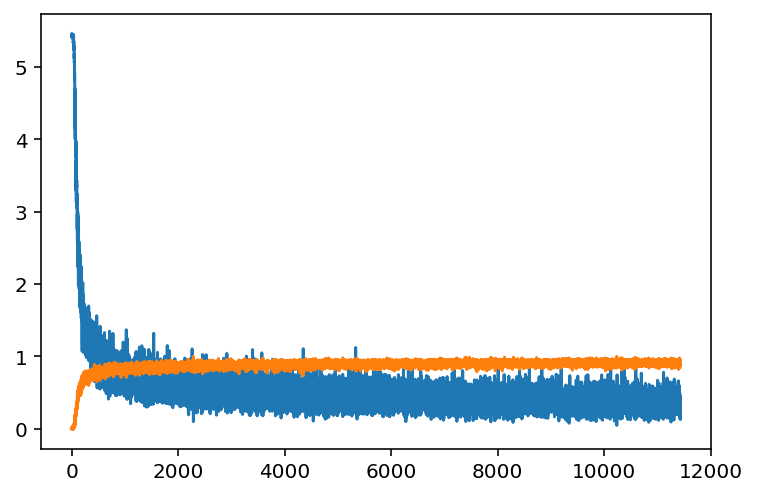

In [18]:
plt.plot(loss_list)
plt.plot(acc_list)

In [10]:
images.size()[0]

100

In [13]:
print(model.state_dict())

OrderedDict([('layer1.0.weight', tensor([[[[-1.7426e-01, -2.3497e-01,  1.5055e-01,  5.3450e-02,  7.5423e-02],
          [-1.2977e-01, -6.5332e-02, -2.4735e-01,  3.8090e-02,  1.0929e-01],
          [ 1.8295e-01, -2.3999e-01, -3.5343e-01, -3.1468e-01, -8.4309e-02],
          [ 2.5463e-01,  2.8403e-01,  2.4635e-02, -7.9139e-02, -2.1259e-01],
          [ 1.6756e-01,  3.4907e-01,  2.7340e-01, -8.6316e-02,  5.9388e-02]]],


        [[[ 1.6465e-01, -2.3805e-02,  1.3689e-01, -1.3950e-01,  1.1706e-01],
          [-1.9957e-01, -3.9431e-02, -1.3595e-01, -1.1525e-01, -1.0062e-01],
          [-8.1095e-02,  3.0955e-02, -1.3714e-01, -1.6872e-02,  2.0408e-01],
          [-2.6757e-01,  5.6518e-02,  1.6303e-01,  7.2729e-02, -6.8437e-03],
          [-2.8907e-01, -1.0626e-02,  7.9300e-02,  5.1189e-02,  8.4561e-02]]],


        [[[ 1.1916e-01,  1.4792e-01,  8.7157e-02,  6.9928e-02, -3.1002e-02],
          [-8.9472e-02, -4.7546e-02, -2.3675e-01, -2.5765e-02, -2.0163e-01],
          [-2.0302e-01, -1.5149e-01

In [15]:
torch.save(model.state_dict(), "./conv_network_dic")
torch.save(model, "./conv_network_model")


In [36]:
np.save("./labels.npy", train_loader.dataset.classes)